In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
!kaggle datasets list



ref                                                  title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                             3KB  2024-03-02 18:50:30          16518        326  0.9411765        
sukhmandeepsinghbrar/heart-attack-dataset            Heart Attack Dataset                           16KB  2024-03-30 05:14:35            926         22  1.0              
divu2001/coffee-shop-sales-analysis                  Coffee Shop Sales Analysis                      2MB  2024-03-30 10:57:57            953         26  1.0              
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                             19MB  2024-02-21 20:16:17          23409     

In [19]:
train_df = pd.read_csv('/Users/ameeshi/Desktop/playground-series-s3e11/train.csv')

In [20]:
test_df = pd.read_csv('/Users/ameeshi/Desktop/playground-series-s3e11/test.csv')

EDA


In [29]:
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette("hls", 8)

In [26]:
train_df.drop('id', axis = 1, inplace = True)
test_df = test_df.drop('id', axis = 1)

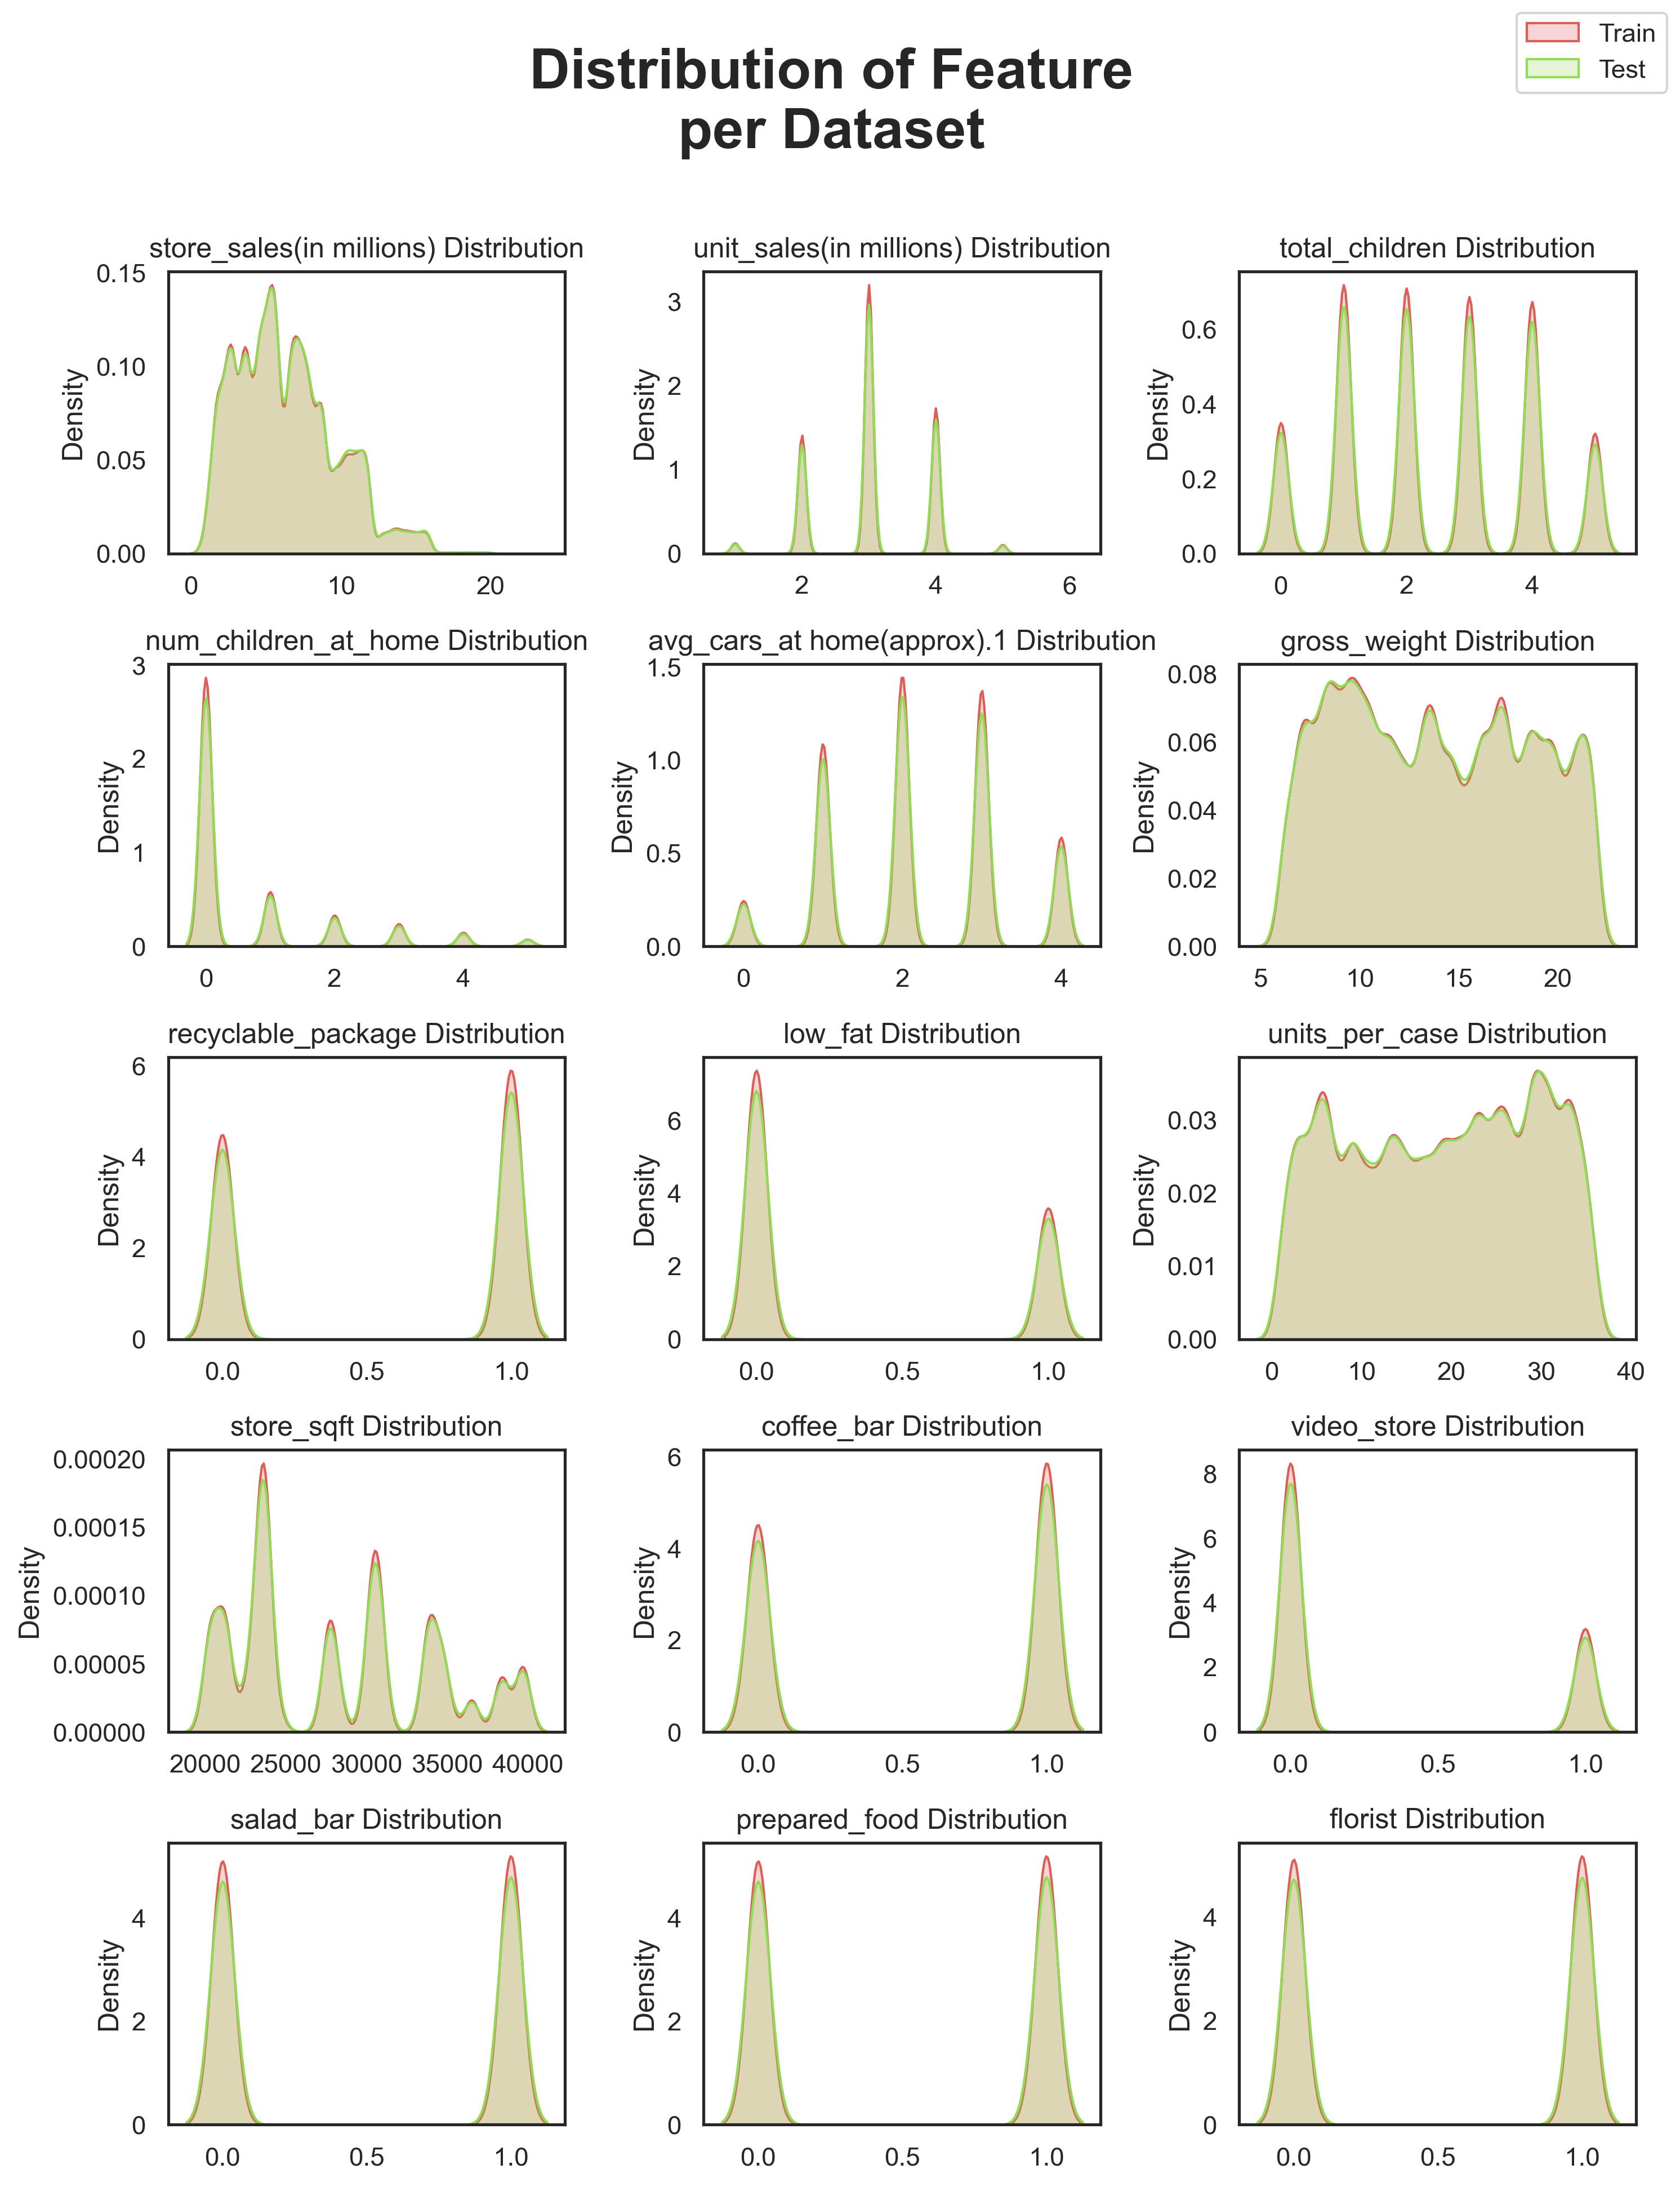

In [43]:
fig, ax = plt.subplots(5, 3, figsize = (10, 13), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_df.columns):
    sns.kdeplot(train_df[column], ax=ax[i], color=pal[0], fill = True)    
    sns.kdeplot(test_df[column], ax=ax[i], color=pal[2], fill = True)

    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

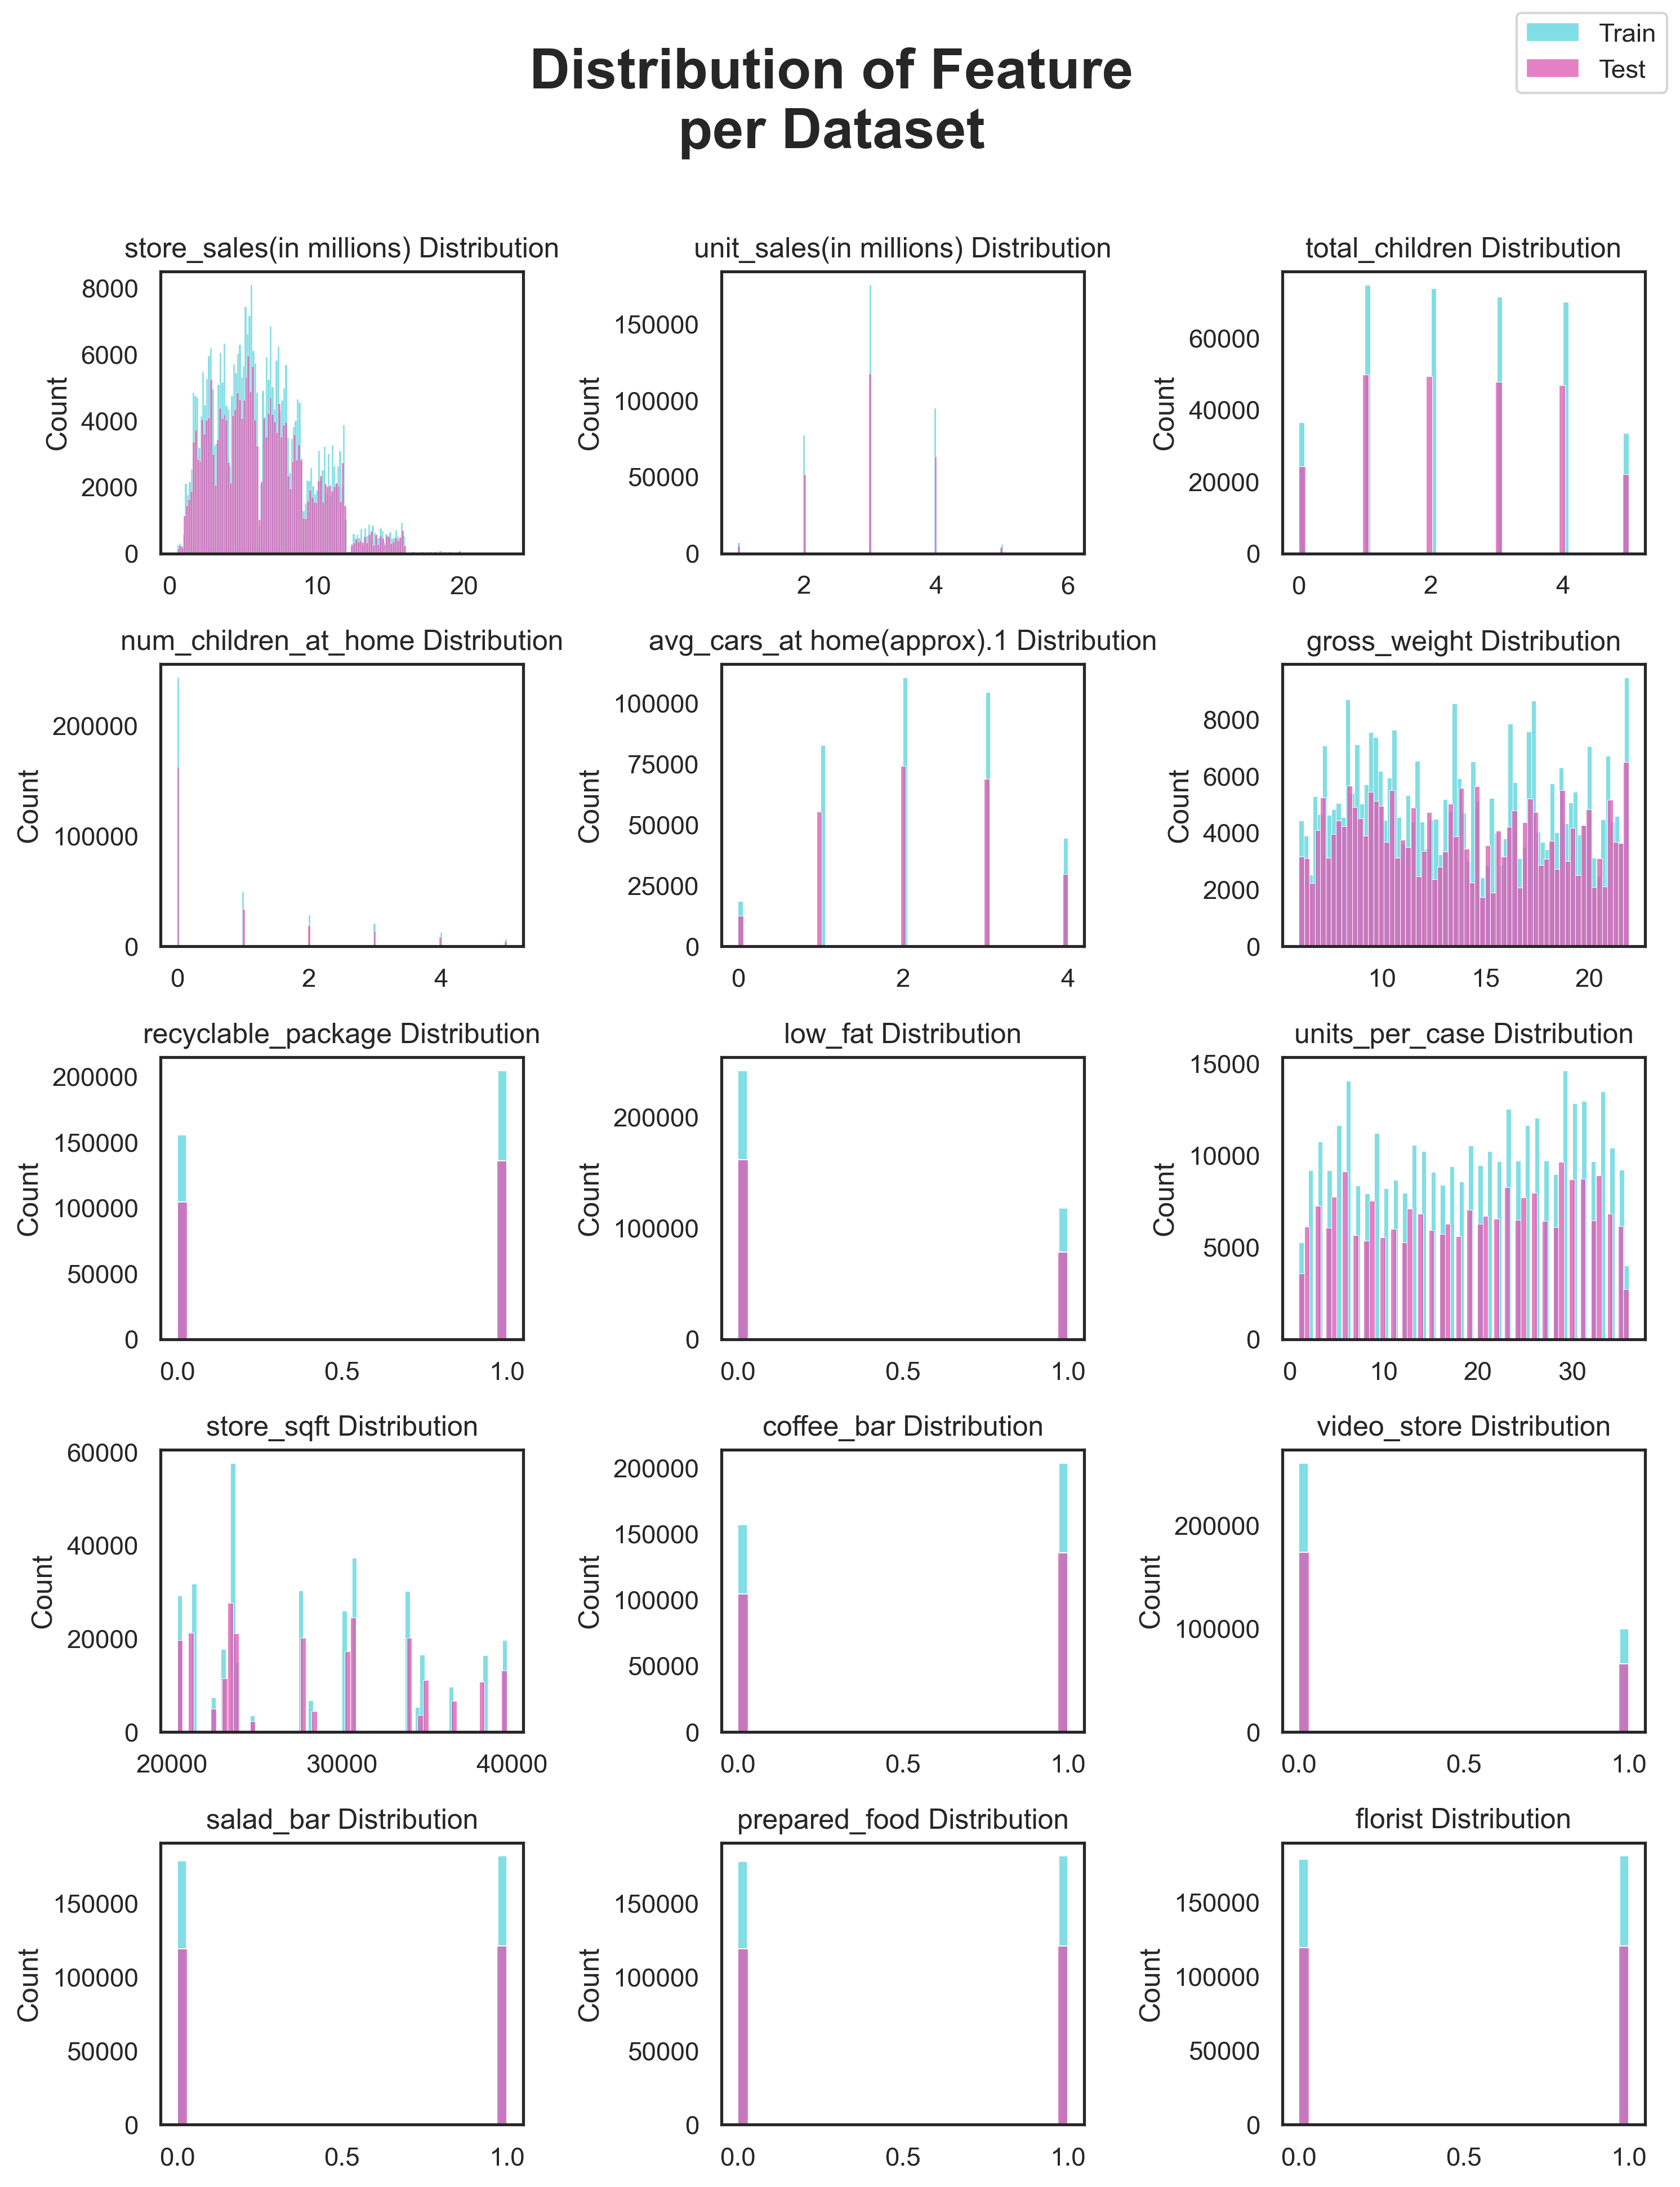

In [35]:
fig, ax = plt.subplots(5, 3, figsize = (10, 13), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_df.columns):
    sns.histplot(train_df[column], ax=ax[i], color=pal[4], fill = True)    
    sns.histplot(test_df[column], ax=ax[i], color=pal[7], fill = True)

    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

In [39]:
def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, annot = True, annot_kws = {'size' : 7}, cmap = pal)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

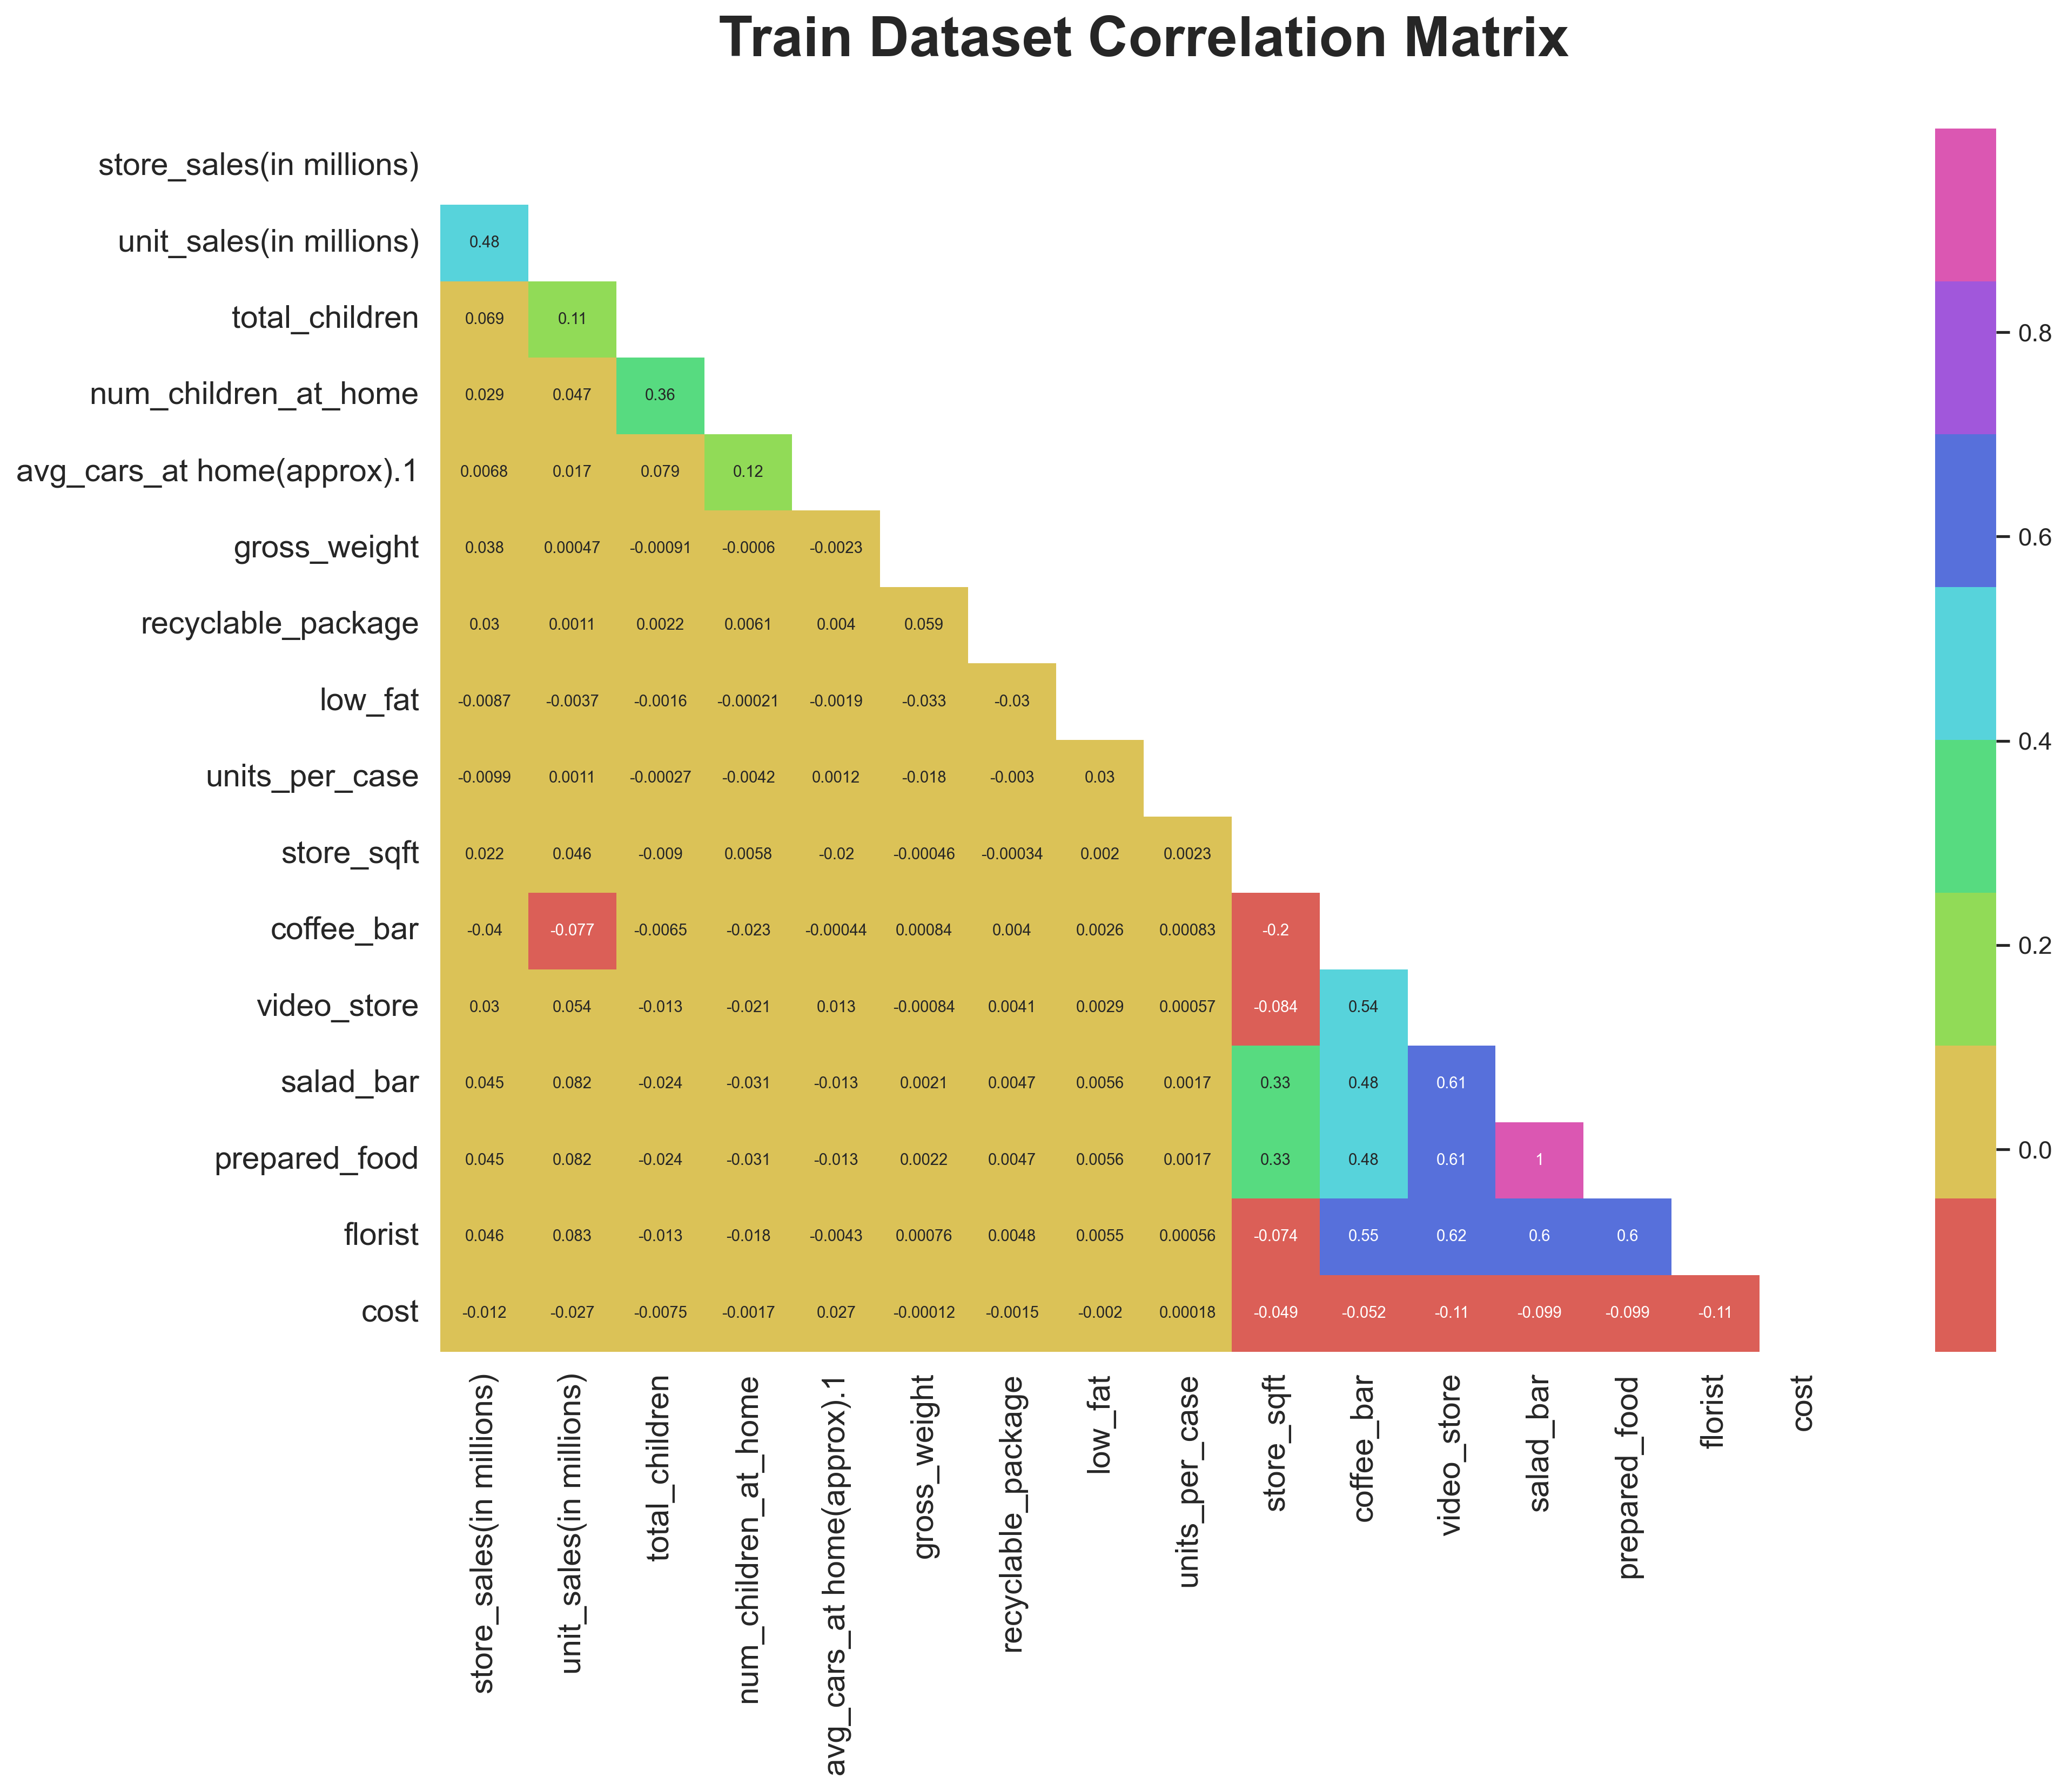

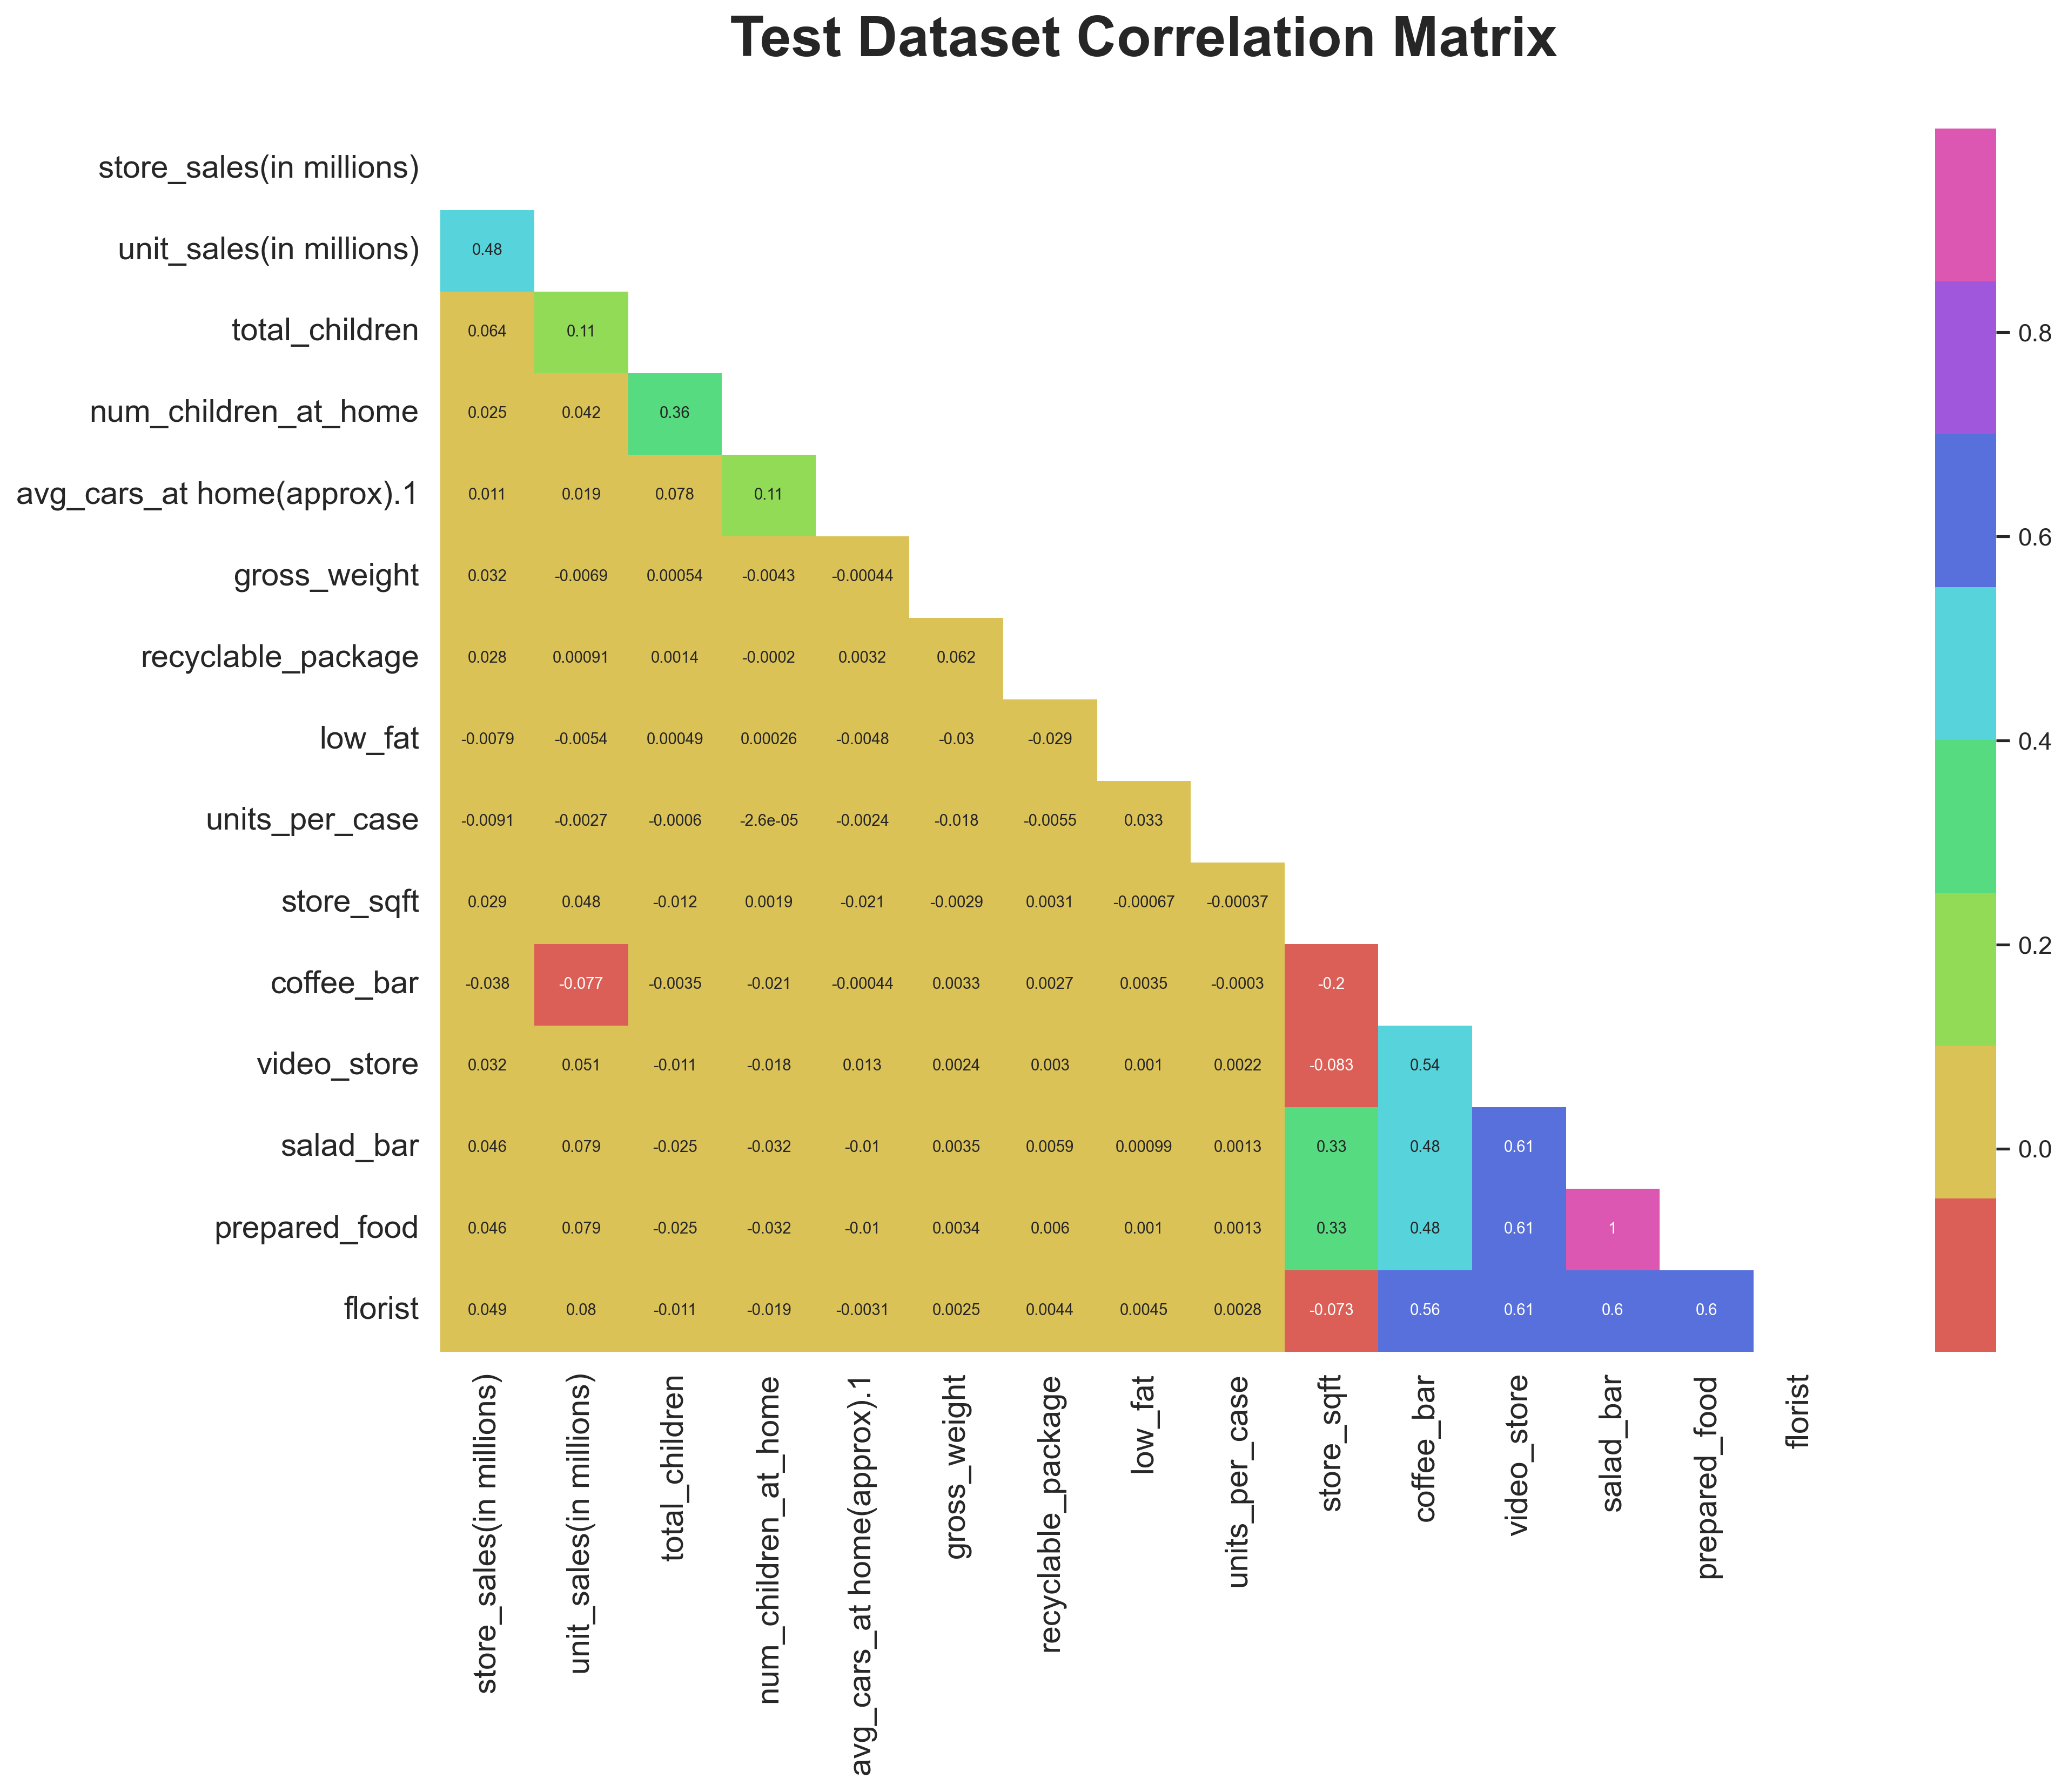

In [40]:

heatmap(train_df, 'Train')
heatmap(test_df, 'Test')